<a href="https://colab.research.google.com/github/edanbave94/Deep_Learning/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import islice
dataset = pd.read_csv("https://raw.githubusercontent.com/edanbave94/Deep_Learning/refs/heads/main/HVAC%20Energy%20Data.csv")


In [ ]:
print(dataset.head())

  Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0                 8/18/2019 0:00                        85.6   
1                 8/18/2019 0:30                        84.3   
2                 8/18/2019 1:00                        84.6   
3                 8/18/2019 1:30                        84.8   
4                 8/18/2019 2:00                        84.7   

   Cooling Water Temperature (C)  Building Load (RT)  \
0                           31.4               479.6   
1                           31.1               460.3   
2                           31.3               462.4   
3                           31.4               458.5   
4                           31.4               455.4   

   Chiller Energy Consumption (kWh)  Outside Temperature (F)  Dew Point (F)  \
0                             116.2                       82             75   
1                             114.5                       82             75   
2                             116.8      

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(dataset['Local Time (Timezone : GMT+8h)']):
    dataset['Local Time (Timezone : GMT+8h)'] = pd.to_datetime(dataset['Local Time (Timezone : GMT+8h)'])

print(dataset['Local Time (Timezone : GMT+8h)'].head())

0   2019-08-18 00:00:00
1   2019-08-18 00:30:00
2   2019-08-18 01:00:00
3   2019-08-18 01:30:00
4   2019-08-18 02:00:00
Name: Local Time (Timezone : GMT+8h), dtype: datetime64[ns]


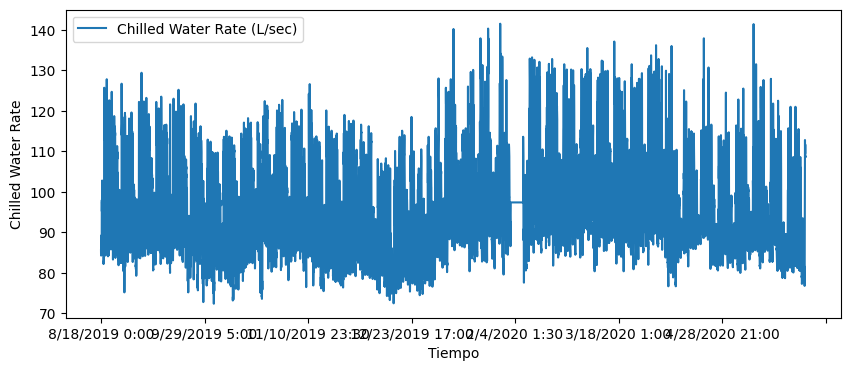

In [ ]:
dataset.plot(x='Local Time (Timezone : GMT+8h)', y='Chilled Water Rate (L/sec)', figsize=(10,4))
plt.ylabel('Chilled Water Rate')
plt.xlabel('Tiempo')
plt.show()

In [ ]:
dataset.shape

(13615, 10)

In [ ]:
dataset['Local Time (Timezone : GMT+8h)'] = pd.to_datetime(dataset['Local Time (Timezone : GMT+8h)'])
dataset['Date'] = dataset['Local Time (Timezone : GMT+8h)'].dt.date
days_group = {day: group for day, group in dataset.groupby('Date')}

for day, subset in days_group.items():
    print(f"Date: {day}")
    print(subset.head())  # Muestra las primeras filas de cada día
    print("\n")

In [25]:
dia_seleccionado = '2019-08-18'
dia_seleccionado = datetime.strptime(dia_seleccionado, '%Y-%m-%d').date()

datos_dia = days_group[dia_seleccionado]
print(f"Datos del día {dia_seleccionado}:")
print(datos_dia.head())  # Mostrar primeras filas del día seleccionado



Datos del día 2019-08-18:
  Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0            2019-08-18 00:00:00                        85.6   
1            2019-08-18 00:30:00                        84.3   
2            2019-08-18 01:00:00                        84.6   
3            2019-08-18 01:30:00                        84.8   
4            2019-08-18 02:00:00                        84.7   

   Cooling Water Temperature (C)  Building Load (RT)  \
0                           31.4               479.6   
1                           31.1               460.3   
2                           31.3               462.4   
3                           31.4               458.5   
4                           31.4               455.4   

   Chiller Energy Consumption (kWh)  Outside Temperature (F)  Dew Point (F)  \
0                             116.2                       82             75   
1                             114.5                       82             75   
2              

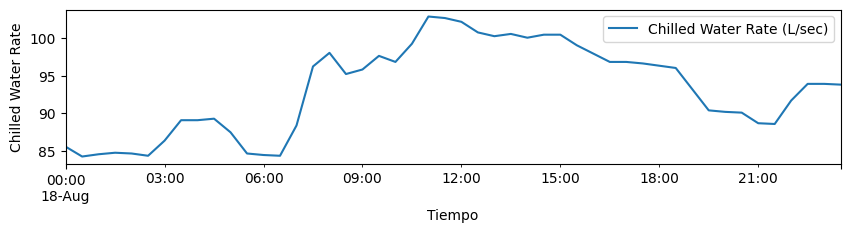

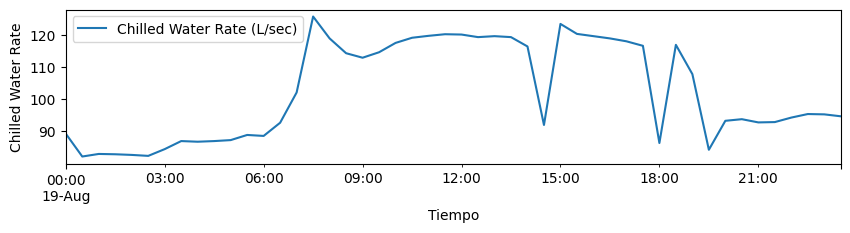

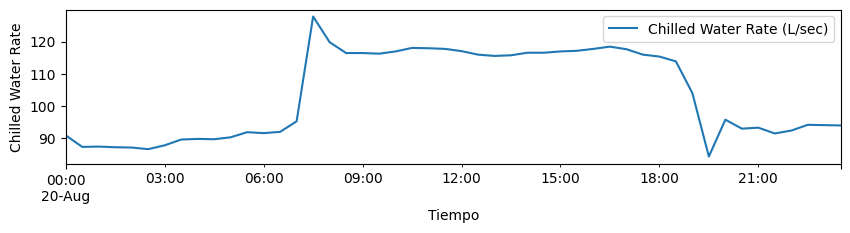

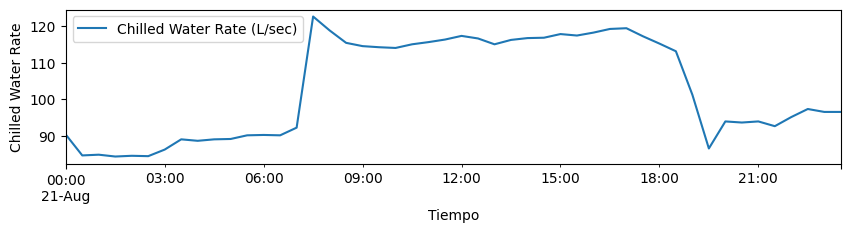

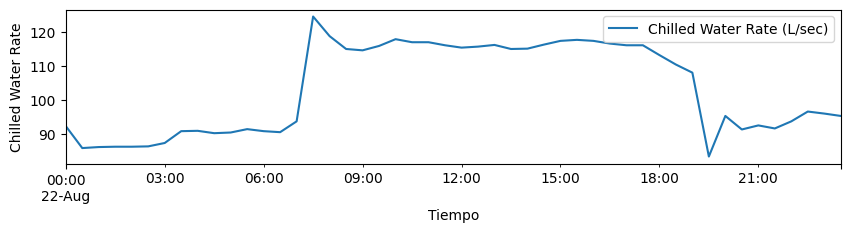

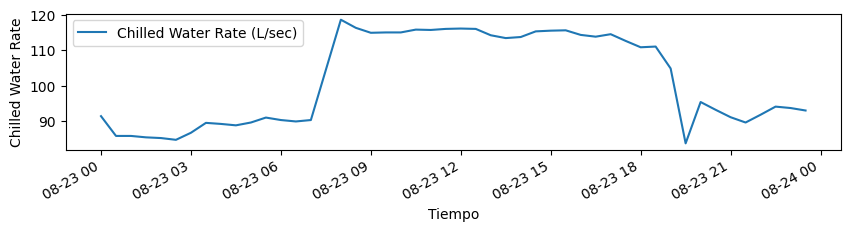

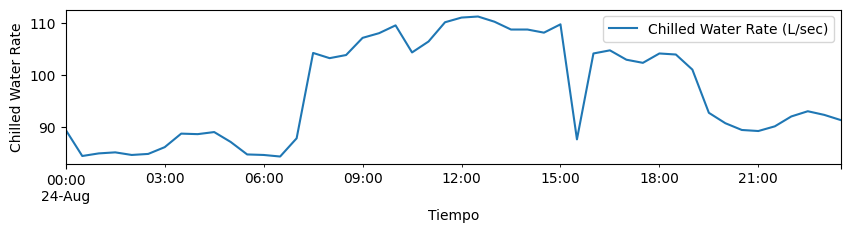

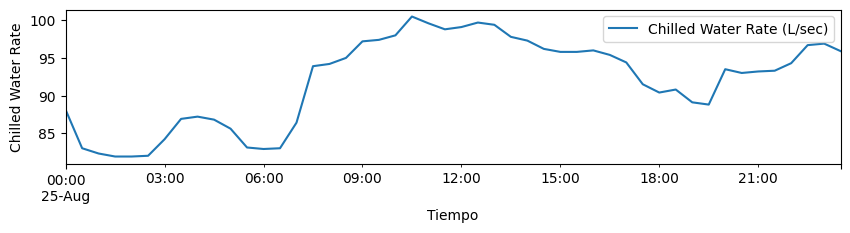

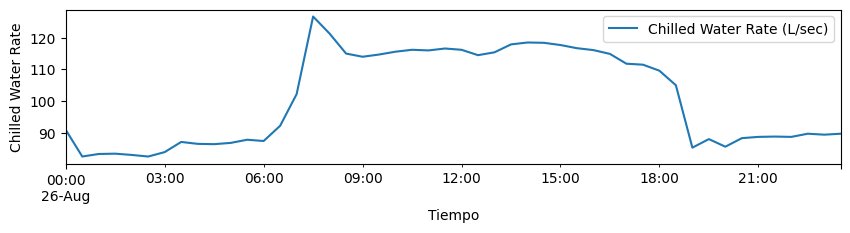

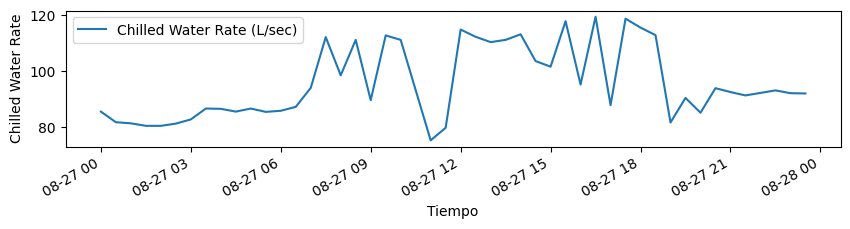

In [30]:
for day, subset in islice(days_group.items(), 10):
    datos_dia = days_group[day]
    datos_dia.plot(x='Local Time (Timezone : GMT+8h)', y='Chilled Water Rate (L/sec)', figsize=(10,2))
    plt.ylabel('Chilled Water Rate')
    plt.xlabel('Tiempo')
    plt.show()